
 Numpy
  - Vectorization
  - Boardcast
  - Identify Matrix
  - Indexing and Slicing
  - Fancy Array
  - Reduction Operation

# Basic Section (Start)


In [1]:
import numpy as np

## Numpy (Review)

Main object type is `np.array`

Many ways to create it,

One way is to convert a python list

In [2]:
python_list = [1, 2, 3]
arr = np.array(python_list)
arr

array([1, 2, 3])

In [3]:
arr**2

array([1, 4, 9])

In [5]:
python_list**2 #__pow__

TypeError: unsupported operand type(s) for ** or pow(): 'list' and 'int'

In [10]:
# class.function(self, args) = instance.function(args)

In [6]:
# Magic Function with __XXX__
# arr.__pow__(2)
python_list.__pow__(2)

AttributeError: 'list' object has no attribute '__pow__'

Many times a list comprehension is used to create a list and then converted to a array

In [7]:
python_list_pow = [i**2 for i in python_list]  # list comprehension
python_list_pow

[1, 4, 9]

In [8]:
# Extend the behavior of built-in class use inheritance
# not directly changing it
class PowerList(list):
    def __pow__(self, exponent):
        print("I am called __pow___ for powerlist")
        if not isinstance(exponent, int):
            raise ValueError("Exponent must be an integer")
        return [i**2 for i in self]

my_list = PowerList()
my_list.extend([1,2,3])
print("Original list:", my_list)

powered_list = my_list ** 2
print("List to the power of 2:", powered_list)


Original list: [1, 2, 3]
I am called __pow___ for powerlist
List to the power of 2: [1, 4, 9]


### Exercise (Pre-Lec)
Create a numpy array that contain  intergers i  such that  0<i<100 and $2^i$ has the last digit 6

In [9]:
import numpy as np
result = np.array([i for i in range(1,100) if (2**i)%10==6])
print(result)

[ 4  8 12 16 20 24 28 32 36 40 44 48 52 56 60 64 68 72 76 80 84 88 92 96]


Create a 2D numpy array $A$ (5,10) such that $A_{ij} = i\times j$

In [11]:
import numpy as np
A = np.zeros((5,10), dtype=int)
for i in range(5):
    for j in range(10):
        A[i,j] = i*j
print(A)

[[ 0  0  0  0  0  0  0  0  0  0]
 [ 0  1  2  3  4  5  6  7  8  9]
 [ 0  2  4  6  8 10 12 14 16 18]
 [ 0  3  6  9 12 15 18 21 24 27]
 [ 0  4  8 12 16 20 24 28 32 36]]


## Another way to create a numpy array is with initializing functions

- np.zeros
- np.ones
- np.arange

These functions along with `reshape` can be used to create initial matrix without any for loops

In [13]:
np.zeros(shape = (10, 10))

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [16]:
np.ones((10, 10)) * 2

array([[2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2.]])

In [12]:
np.arange(2, 10, 2)  # equivalent to range(2,10,2)

array([2, 4, 6, 8])

### Exercise (In Lec)

Create an array of first 10 powers of 2

In [17]:
import numpy as np
list = np.array([2**i for i in range(1,11)])
list

array([   2,    4,    8,   16,   32,   64,  128,  256,  512, 1024])

### 1D vs 2D array

In [22]:
array1D = np.arange(10) * np.arange(10)
array1D = array1D.reshape(1,-1)
print(array1D.shape)
array1D

(1, 10)


array([[ 0,  1,  4,  9, 16, 25, 36, 49, 64, 81]])

In [19]:
array2D = np.arange(10).reshape(10, 1)
print(array2D.shape)
array2D

(10, 1)


array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

In [23]:
array2D + array1D #boardcasting

array([[ 0,  1,  4,  9, 16, 25, 36, 49, 64, 81],
       [ 1,  2,  5, 10, 17, 26, 37, 50, 65, 82],
       [ 2,  3,  6, 11, 18, 27, 38, 51, 66, 83],
       [ 3,  4,  7, 12, 19, 28, 39, 52, 67, 84],
       [ 4,  5,  8, 13, 20, 29, 40, 53, 68, 85],
       [ 5,  6,  9, 14, 21, 30, 41, 54, 69, 86],
       [ 6,  7, 10, 15, 22, 31, 42, 55, 70, 87],
       [ 7,  8, 11, 16, 23, 32, 43, 56, 71, 88],
       [ 8,  9, 12, 17, 24, 33, 44, 57, 72, 89],
       [ 9, 10, 13, 18, 25, 34, 45, 58, 73, 90]])

### Distinction between numpy 1D arrays and numpy 2D arrays

This tends to cause a lot of confusion for new numpy users.
Follow the below examples carefully to understand the distinction.

In [24]:
Z = np.zeros(shape=10)
print(Z)
Z.shape

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


(10,)

In [25]:
# Create 2D array by reshape
Z = np.zeros(10).reshape(10, 1)
print(Z)
Z.shape

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


(10, 1)

In [26]:
Z.squeeze()  # remove axis with length = 1

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [27]:
# squeeze Remove axes of length one
Z = np.zeros(6).reshape(1, 1, 2, 3)
print(Z)
print(Z.shape, "\n")

Z_squeeze = Z.squeeze()
print(Z_squeeze)
print(Z_squeeze.shape)

[[[[0. 0. 0.]
   [0. 0. 0.]]]]
(1, 1, 2, 3) 

[[0. 0. 0.]
 [0. 0. 0.]]
(2, 3)


In [28]:
# Matrix Multiplication
Mat = np.random.randn(10, 10)
Mat.shape

(10, 10)

In [29]:
Z = np.arange(10).reshape(10, 1)
print(Z)
print(Z.shape)

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]
(10, 1)


In [31]:
# (N, M) @ (M, K) = (N, K)
Mat @ Z

array([[ -5.6664275 ],
       [ 16.94700887],
       [ 14.34146907],
       [-31.22347706],
       [ -5.91684506],
       [  8.17622534],
       [ -6.30946357],
       [  5.73718103],
       [-20.92601669],
       [-10.54034573]])

In [32]:
Z = np.arange(10).reshape(1, 10)

print(Mat.shape)
print(Z.shape)

# (N, M) @ (M, K) = (N, K)
Mat @ Z  # (10, 10) @ (1, 10) NOT WORKING

(10, 10)
(1, 10)


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 1 is different from 10)

In [ ]:
(Z @ Mat).shape

In [37]:
# array variable is also a pointer
x = np.zeros((5, 5))
y = x.copy()
x[1, 1] = 2

y

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

## Array Broadcasting

Normally you only do arithmetic operations between arrays of the same dimension

The smaller array of at least 1 dimension of size 1 is “broadcast” across the larger array so that they have compatible shapes by dimension.

In [38]:
a = np.arange(3).reshape(1, 3)
b = np.arange(6).reshape(6, 1)
c = np.ones((3, 3))
d = np.zeros((6, 3))
print(a, "\n")
print(b, "\n")
print(c, "\n")
print(d, "\n")

[[0 1 2]] 

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]] 

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]] 

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]] 



In [ ]:
# c + 2
# c + c
#d + a
# c + d
#b + d

ValueError: operands could not be broadcast together with shapes (3,3) (6,3) 

In [44]:
a + b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4],
       [3, 4, 5],
       [4, 5, 6],
       [5, 6, 7]])

In [45]:
X = np.arange(4).reshape(-1, 1) * 10
Y = np.arange(3).reshape(1, -1)
print(X.shape)
print(Y.shape, "\n")
print(X, "\n")
print(Y, "\n")
X + Y

(4, 1)
(1, 3) 

[[ 0]
 [10]
 [20]
 [30]] 

[[0 1 2]] 



array([[ 0,  1,  2],
       [10, 11, 12],
       [20, 21, 22],
       [30, 31, 32]])

it tries to duplicates every x’s col and y’s row (dim size = 1) to match the other arrays
1. Make the two arrays have the same number of dimensions.
  - If the numbers of dimensions of the two arrays are different, add new dimensions with size 1 to the head of the array with the smaller dimension.

2. If there is a dimension whose size is not 1 in either of the two arrays, it cannot be broadcasted, and an error is raised.

![](http://scipy-lectures.org/_images/numpy_broadcasting.png)

### Exercise (In-Lecture)
create a 2D numpy array $A$ (shape = (5,10) ) such that $A_{ij} = i\times j$, but without using list comprehensions. Use broadcasting instead


In [48]:
# hint: check how it looks for
#       np.arange(5).reshape(-1,1)
#       np.arange(10).reshape(1,-1)
import numpy as np
rows = np.arange(5).reshape(5,1)
cols = np.arange(10).reshape(1,10)
A = rows*cols
A

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18],
       [ 0,  3,  6,  9, 12, 15, 18, 21, 24, 27],
       [ 0,  4,  8, 12, 16, 20, 24, 28, 32, 36]])

Use array broadcasting to create a (10,10) numpy array with values
$$ A_{ij} = 2^i + j $$

In [50]:
# Hint: Check the values of
#       2**(np.arange(10).reshape(-1,1))
#       np.arange(10).reshape(1,-1)
import numpy as np
rows = np.array([2**i for i in range(10)]).reshape(10,1)
cols = np.arange(10).reshape(-1,10)
A = rows + cols
A

array([[  1,   2,   3,   4,   5,   6,   7,   8,   9,  10],
       [  2,   3,   4,   5,   6,   7,   8,   9,  10,  11],
       [  4,   5,   6,   7,   8,   9,  10,  11,  12,  13],
       [  8,   9,  10,  11,  12,  13,  14,  15,  16,  17],
       [ 16,  17,  18,  19,  20,  21,  22,  23,  24,  25],
       [ 32,  33,  34,  35,  36,  37,  38,  39,  40,  41],
       [ 64,  65,  66,  67,  68,  69,  70,  71,  72,  73],
       [128, 129, 130, 131, 132, 133, 134, 135, 136, 137],
       [256, 257, 258, 259, 260, 261, 262, 263, 264, 265],
       [512, 513, 514, 515, 516, 517, 518, 519, 520, 521]])

# Basic Section (End)

## Matrix creation

There are some functions to create standard matrices

In [51]:
np.eye(5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [52]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [53]:
# np.diag: Extract a diagonal or construct a diagonal array.
M = np.diag(np.arange(10))  # .reshape(5,20)
M

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 2, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 3, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 4, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 5, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 6, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 7, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 8, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 9]])

In [54]:
np.diag(M)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [55]:
# Transpose of the matrix
A = np.arange(15).reshape(5, 3)
print(A.shape)
A

(5, 3)


array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14]])

In [56]:
A.T

array([[ 0,  3,  6,  9, 12],
       [ 1,  4,  7, 10, 13],
       [ 2,  5,  8, 11, 14]])

In [57]:
A.transpose()

array([[ 0,  3,  6,  9, 12],
       [ 1,  4,  7, 10, 13],
       [ 2,  5,  8, 11, 14]])

### random seed

In [58]:
np.random.rand(5, 5)

array([[0.62465261, 0.65864944, 0.67197332, 0.39613656, 0.15404444],
       [0.33649127, 0.96149929, 0.81974041, 0.48654787, 0.57969163],
       [0.77881454, 0.6581021 , 0.87550664, 0.98143606, 0.08581546],
       [0.19167474, 0.07952711, 0.21495794, 0.57909065, 0.40578247],
       [0.97277405, 0.9663019 , 0.72042428, 0.61352173, 0.42275196]])

In [59]:
np.random.seed(0)  # control the random state
print(np.random.rand(5, 5))
print(np.random.rand(5, 5))
print(np.random.rand(5, 5))

[[0.5488135  0.71518937 0.60276338 0.54488318 0.4236548 ]
 [0.64589411 0.43758721 0.891773   0.96366276 0.38344152]
 [0.79172504 0.52889492 0.56804456 0.92559664 0.07103606]
 [0.0871293  0.0202184  0.83261985 0.77815675 0.87001215]
 [0.97861834 0.79915856 0.46147936 0.78052918 0.11827443]]
[[0.63992102 0.14335329 0.94466892 0.52184832 0.41466194]
 [0.26455561 0.77423369 0.45615033 0.56843395 0.0187898 ]
 [0.6176355  0.61209572 0.616934   0.94374808 0.6818203 ]
 [0.3595079  0.43703195 0.6976312  0.06022547 0.66676672]
 [0.67063787 0.21038256 0.1289263  0.31542835 0.36371077]]
[[0.57019677 0.43860151 0.98837384 0.10204481 0.20887676]
 [0.16130952 0.65310833 0.2532916  0.46631077 0.24442559]
 [0.15896958 0.11037514 0.65632959 0.13818295 0.19658236]
 [0.36872517 0.82099323 0.09710128 0.83794491 0.09609841]
 [0.97645947 0.4686512  0.97676109 0.60484552 0.73926358]]


### Exercise (Post Lecture)

Create this matrix   

```python
array([[5., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 4., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 3., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 3., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 4., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 5.]])
```

In [60]:
import numpy as np
matrix = np.ones((11,11))
diag_value = [5,4,3,2,1,0,1,2,3,4,5]
np.fill_diagonal(matrix,diag_value)
matrix

array([[5., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 4., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 3., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 3., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 4., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 5.]])

## Array Indexing and Slicing

In [61]:
import numpy as np

arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [63]:
arr[5]

np.int64(5)

In [64]:
arr[-3]

np.int64(7)

In [65]:
arr[3:7]

array([3, 4, 5, 6])

In [66]:
arr[2:]

array([2, 3, 4, 5, 6, 7, 8, 9])

In [67]:
arr[0:-3]

array([0, 1, 2, 3, 4, 5, 6])

In [68]:
arr[0:6:2]  # similar as range(0,6,2)

array([0, 2, 4])

In [69]:
arr[5:0:-2]

array([5, 3, 1])

In [70]:
arr[::-1]

array([9, 8, 7, 6, 5, 4, 3, 2, 1, 0])

In [71]:
arr[:]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [72]:
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [73]:
a = 10 * np.arange(6).reshape(-1, 1) + np.arange(6)
print(a)
# a[4:, 4:]

[[ 0  1  2  3  4  5]
 [10 11 12 13 14 15]
 [20 21 22 23 24 25]
 [30 31 32 33 34 35]
 [40 41 42 43 44 45]
 [50 51 52 53 54 55]]


Can use all the above slicing methods for each dimension of a multidemnsional array
![](http://scipy-lectures.org/_images/numpy_indexing.png)

try it yourself

### Exercise (Post-Lecture)
Create the following matrix, using `np.ones()`, `np.zeros()`, and slicing
```python
array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 0., 0., 0., 0., 0., 0., 1., 1.],
       [1., 1., 0., 0., 0., 0., 0., 0., 1., 1.],
       [1., 1., 0., 0., 0., 0., 0., 0., 1., 1.],
       [1., 1., 0., 0., 0., 0., 0., 0., 1., 1.],
       [1., 1., 0., 0., 0., 0., 0., 0., 1., 1.],
       [1., 1., 0., 0., 0., 0., 0., 0., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])
```

In [74]:
import numpy as np
matrix = np.ones((10,10))
matrix[2:8,2:8] = 0
matrix

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 0., 0., 0., 0., 0., 0., 1., 1.],
       [1., 1., 0., 0., 0., 0., 0., 0., 1., 1.],
       [1., 1., 0., 0., 0., 0., 0., 0., 1., 1.],
       [1., 1., 0., 0., 0., 0., 0., 0., 1., 1.],
       [1., 1., 0., 0., 0., 0., 0., 0., 1., 1.],
       [1., 1., 0., 0., 0., 0., 0., 0., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

Create the following matrix
```python
array([[-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
       [-1.,  0.,  1.,  2.,  3.,  4., -1., -1., -1., -1.],
       [-1.,  5.,  6.,  7.,  8.,  9., -1., -1., -1., -1.],
       [-1., 10., 11., 12., 13., 14., -1., -1., -1., -1.],
       [-1., 15., 16., 17., 18., 19., -1., -1., -1., -1.],
       [-1., 20., 21., 22., 23., 24., -1., -1., -1., -1.],
       [-1., 25., 26., 27., 28., 29., -1., -1., -1., -1.],
       [-1., 30., 31., 32., 33., 34., -1., -1., -1., -1.],
       [-1., 35., 36., 37., 38., 39., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.]])
```

In [75]:
import numpy as np
matrix = np.full((10,10),-1.0)
numbers = np.arange(40).reshape(8,5)
matrix[1:9,1:6]=numbers
matrix

array([[-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
       [-1.,  0.,  1.,  2.,  3.,  4., -1., -1., -1., -1.],
       [-1.,  5.,  6.,  7.,  8.,  9., -1., -1., -1., -1.],
       [-1., 10., 11., 12., 13., 14., -1., -1., -1., -1.],
       [-1., 15., 16., 17., 18., 19., -1., -1., -1., -1.],
       [-1., 20., 21., 22., 23., 24., -1., -1., -1., -1.],
       [-1., 25., 26., 27., 28., 29., -1., -1., -1., -1.],
       [-1., 30., 31., 32., 33., 34., -1., -1., -1., -1.],
       [-1., 35., 36., 37., 38., 39., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.]])

# Fancy Array Indexing

We can use numpy arrays as an index for other numpy arrays

In [76]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [77]:
# use array/list/tuple as indexs
idx = np.array([2, 7, -1])
idx

array([ 2,  7, -1])

In [78]:
print(arr[idx])
arr[idx] = -1
arr

[2 7 9]


array([ 0,  1, -1,  3,  4,  5,  6, -1,  8, -1])

In [79]:
# use bool array
arr < 0

array([False, False,  True, False, False, False, False,  True, False,
        True])

In [80]:
arr[arr < 0] = 100
arr

array([  0,   1, 100,   3,   4,   5,   6, 100,   8, 100])

For multidimensional array, array indexing works different from slicing

In [81]:
X = np.zeros((6, 6))
X[2:5, 0:3] = 1
X

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 0., 0., 0.],
       [1., 1., 1., 0., 0., 0.],
       [1., 1., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [82]:
np.arange(2, 5), np.arange(0, 3)

(array([2, 3, 4]), array([0, 1, 2]))

In [83]:
X = np.zeros((6, 6))
X[np.arange(2, 5), np.arange(0, 3)] = 1
X

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [84]:
# Here is our array, what should we return?
a = 10 * np.arange(6).reshape(-1, 1) + np.arange(6)
a

array([[ 0,  1,  2,  3,  4,  5],
       [10, 11, 12, 13, 14, 15],
       [20, 21, 22, 23, 24, 25],
       [30, 31, 32, 33, 34, 35],
       [40, 41, 42, 43, 44, 45],
       [50, 51, 52, 53, 54, 55]])

In [85]:
a[(1, 2, 3, 4, 5), (0, 1, 2, 3, 4)]

array([10, 21, 32, 43, 54])

In [86]:
a[3:, [0, 2, 5]]

array([[30, 32, 35],
       [40, 42, 45],
       [50, 52, 55]])

In [87]:
mask = np.array([1, 0, 1, 0, 0, 1], dtype=bool)
print(mask)
a[mask, 2]

[ True False  True False False  True]


array([ 2, 22, 52])

In [88]:
mask = np.array([1,0,1,0,0,1])
a[mask,2]

array([12,  2, 12,  2,  2, 12])

![](http://scipy-lectures.org/_images/numpy_fancy_indexing.png)

### Exercise (Post - Lecture)
Create the following matrix
```python
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])
```

In [89]:
import numpy as np
matrix = np.zeros((10, 10))
left_positions = [(4,1), (5,1), (6,3), (7,5), (8,7), (9,9)]
for i, j in left_positions:
    matrix[i, j] = 1
right_positions = [(0,9), (1,7), (2,5), (3,3)]
for i, j in right_positions:
    matrix[i, j] = 1
matrix

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

### Exercise (Post Lecture)
Write a function to compute the [trace](https://en.wikipedia.org/wiki/Trace_(linear_algebra)) of a square numpy array using fancy array indexing. Compare your implementation to numpy's built-in function `np.trace`.

In [90]:
def trace(a):
  n=a.shape[0]
  return a[np.arange(n),np.arange(n)].sum(n)
trace(a) == np.trace(a)

AxisError: axis 6 is out of bounds for array of dimension 1

We can use `np.where`, to get indices of the `True` values in a boolean array

In [ ]:
Y = np.arange(25).reshape(5, 5)
print(Y)
Y > 14
print(np.where(Y > 14))
# Y[np.where(Y>14)]

## Reduction operations

Many reduction functions are available

- np.sum, np.prod
- np.min, np.max
- np.any, np.all

Partial reductions

- np.cumsum, np.cumprod

In [91]:
X = np.arange(50).reshape(10,5)
X

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24],
       [25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34],
       [35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44],
       [45, 46, 47, 48, 49]])

In [92]:
np.sum(X), np.prod(X)
# class.method(self)

(np.int64(1225), np.int64(0))

The way to understand the “axis” of numpy sum is it collapses the specified axis. So when it collapses the axis 0 (row), it becomes just one row and column-wise sum.

In [93]:
# sum of the rows
np.sum(X, axis=1)

array([ 10,  35,  60,  85, 110, 135, 160, 185, 210, 235])

In [94]:
X.sum(axis=1)

array([ 10,  35,  60,  85, 110, 135, 160, 185, 210, 235])

In [95]:
np.min(X), np.max(X)

(np.int64(0), np.int64(49))

In [96]:
X

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24],
       [25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34],
       [35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44],
       [45, 46, 47, 48, 49]])

In [97]:
np.min(X, axis=0)

array([0, 1, 2, 3, 4])

In [98]:
Y = X < 12
Y

array([[ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False]])

In [99]:
np.any(Y, axis=1)

array([ True,  True,  True, False, False, False, False, False, False,
       False])

In [100]:
np.all(Y, axis=1)

array([ True,  True, False, False, False, False, False, False, False,
       False])

All the above functions can be called on the array object directly

In [101]:
# instance.method(args) = class.method(instance, args)
X.max(axis=0)

array([45, 46, 47, 48, 49])

In [102]:
# np.cumsum
Y = np.arange(10)
print(Y)
np.cumsum(Y)

[0 1 2 3 4 5 6 7 8 9]


array([ 0,  1,  3,  6, 10, 15, 21, 28, 36, 45])

In [103]:
X = np.arange(16).reshape(4, 4)
print(X)
np.cumsum(X, axis=1)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]


array([[ 0,  1,  3,  6],
       [ 4,  9, 15, 22],
       [ 8, 17, 27, 38],
       [12, 25, 39, 54]])

Cumulative operations don't change the shape of the array

### Exercise (Post Lecture)

- Find the column with maximum column sum
- For which rows of the matrix, the sum of the first three elements of the row is greater than the sum of the last two elements of the row

In [ ]:
import numpy as np

np.random.seed(42)
matrix = np.random.randint(0, 10, size=(5, 6))
print("矩阵:")
print(matrix)

column_sums = matrix.sum(axis=0)
max_column_index = np.argmax(column_sums)
max_column_sum = column_sums[max_column_index]

print(f"\n每列的和: {column_sums}")
print(f"列和最大的列索引: {max_column_index}")
print(f"最大列和: {max_column_sum}")
print(f"该列的值: {matrix[:, max_column_index]}")

first_three_sum = matrix[:, :3].sum(axis=1)
last_two_sum = matrix[:, -2:].sum(axis=1)

condition = first_three_sum > last_two_sum
rows_satisfying = np.where(condition)[0]

print(f"\n每行前三个元素和: {first_three_sum}")
print(f"每行最后两个元素和: {last_two_sum}")
print(f"满足条件的行索引: {rows_satisfying}")

### Exercise (Post Lecture)
Compute the the moving average of the array `y` created below, with window size 5.

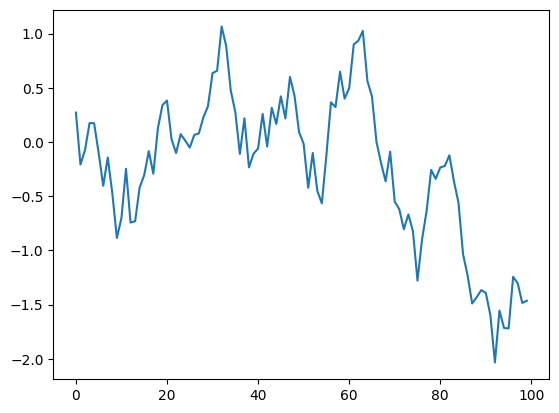

In [106]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(10)
y = np.cumsum(np.random.rand(100) - 0.5)
plt.plot(y)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(10)
y = np.cumsum(np.random.rand(100) - 0.5)

window_size = 5

moving_avg = np.convolve(y, np.ones(window_size)/window_size, mode='valid')


# plt.plot(y)
# plt.plot(z)

## Final Exercise (Post Lecture)

Implement the [Conway's game of Life](https://en.wikipedia.org/wiki/Conway%27s_Game_of_Life) using numpy

In [107]:
import numpy as np

def conways_game_of_life(grid, generations=10):
    """
    康威生命游戏的简化实现
    grid: 初始网格 (2D numpy数组)
    generations: 模拟的代數
    """
    def count_neighbors(grid):
        """计算每个细胞的邻居数量"""
        neighbors = np.zeros_like(grid)
        for i in range(-1, 2):
            for j in range(-1, 2):
                if i == 0 and j == 0:
                    continue
                # 使用roll来处理边界（环形边界）
                neighbors += np.roll(np.roll(grid, i, axis=0), j, axis=1)
        return neighbors
    
    current_grid = grid.copy()
    
    for gen in range(generations):
        neighbors = count_neighbors(current_grid)
        
        # 应用生命游戏规则
        new_grid = np.zeros_like(current_grid)
        
        # 存活规则
        survive = (current_grid == 1) & ((neighbors == 2) | (neighbors == 3))
        new_grid[survive] = 1
        
        # 繁殖规则
        born = (current_grid == 0) & (neighbors == 3)
        new_grid[born] = 1
        
        current_grid = new_grid
        
        print(f"Generation {gen + 1}:")
        print(current_grid)
        print("-" * 30)
    
    return current_grid

# 测试简化版本
if __name__ == "__main__":
    # 创建一个小网格测试
    test_grid = np.zeros((6, 6), dtype=int)
    test_grid[2, 1:4] = 1  # 添加一个闪烁器
    
    print("Initial grid:")
    print(test_grid)
    print("=" * 30)
    
    result = conways_game_of_life(test_grid, generations=5)

Initial grid:
[[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 1 1 1 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]
Generation 1:
[[0 0 0 0 0 0]
 [0 0 1 0 0 0]
 [0 0 1 0 0 0]
 [0 0 1 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]
------------------------------
Generation 2:
[[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 1 1 1 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]
------------------------------
Generation 3:
[[0 0 0 0 0 0]
 [0 0 1 0 0 0]
 [0 0 1 0 0 0]
 [0 0 1 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]
------------------------------
Generation 4:
[[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 1 1 1 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]
------------------------------
Generation 5:
[[0 0 0 0 0 0]
 [0 0 1 0 0 0]
 [0 0 1 0 0 0]
 [0 0 1 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]
------------------------------
